<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/PyTorch_Tutorial_14_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=15)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# hyper parameters
num_epoch = 64
batch_size = 64
learning_rate = 0.001


# Getting norm and std

In [28]:
train_data = torchvision.datasets.CIFAR10('/content',True,transforms.ToTensor(),download=True)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=1)

Files already downloaded and verified


In [77]:
one_sample,_ = train_data[4]

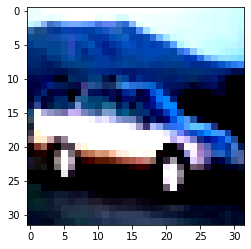

In [78]:
img = one_sample / 2 + 0.5
img = torchvision.utils.make_grid(img).numpy()
img = np.transpose(img,(1,2,0)) # we changed shape from(3,32,32) into (32,32,3) means 0 dimension to the end and ..
plt.imshow(img)

In [35]:
one_sample.shape

torch.Size([3, 32, 32])

In [36]:
one_sample.mean([1,2])    # dimension means we calculate based on dimension of zero

tensor([0.5537, 0.4122, 0.2511])

In [37]:
one_sample.std([1,2])

tensor([0.1595, 0.1665, 0.1603])

In [38]:
mean = torch.zeros(1,3)
std = torch.zeros(1,3)
for i,(samples,lables) in enumerate(train_loader):
  mean += samples.mean([2,3])
  std += samples.std([2,3])

mean = mean/(i+1)
std = std/(i+1)
print(mean)
print(std)


tensor([[0.4914, 0.4822, 0.4465]])
tensor([[0.2023, 0.1994, 0.2010]])


we can use mean and std of the ImageNet dataset.

mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

but our dataset's mean and std is a bit diffrent


In [39]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010))])

In [40]:
train_data = torchvision.datasets.CIFAR10('/content',train=True,transform=transform,download=True)
test_data = torchvision.datasets.CIFAR10('/content',train=False,transform=transform,download=True)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [88]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,...)
    self.conv1 = nn.Conv2d(3,6,5) # input:3*32*32
    # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0,...)
    self.pool1 = nn.MaxPool2d(2,2) # input:6*28*28
    self.conv2 = nn.Conv2d(6,16,5) # input:6*14*14   
    self.pool2 = nn.MaxPool2d(2,2) # input:16*10*10   # we didnt need to define to maxpool layer because they have same properties
    # torch.nn.Linear(in_features, out_features, bias=True,...)
    self.fc1 = nn.Linear(16*5*5,120) #input: 16*5*5
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)


  def forward(self,x):
    out= F.relu(self.conv1(x))
    out = self.pool1(out)
    out= F.relu(self.conv2(out))
    out = self.pool2(out)
    out = out.view(-1,16*5*5) # ATTENTION: transition from conv to fc layer
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)

    return out



In [89]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [90]:
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
  for i,(images,labels) in enumerate(train_loader):

    output = model(images)
    loss = criterion(output,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if(i+1) % 1000 == 0 :
      print(f'epoch = {epoch}/{num_epoch}, steps {i+1}/{n_total_steps} , loss = {loss.item() :.4f}  ')


epoch = 0/4, steps 1000/12500 , loss = 1.6746  
epoch = 0/4, steps 2000/12500 , loss = 1.5005  
epoch = 0/4, steps 3000/12500 , loss = 1.7504  
epoch = 0/4, steps 4000/12500 , loss = 1.5491  
epoch = 0/4, steps 5000/12500 , loss = 1.2851  
epoch = 0/4, steps 6000/12500 , loss = 2.8026  
epoch = 0/4, steps 7000/12500 , loss = 1.4126  
epoch = 0/4, steps 8000/12500 , loss = 0.6606  
epoch = 0/4, steps 9000/12500 , loss = 0.9203  
epoch = 0/4, steps 10000/12500 , loss = 1.7541  
epoch = 0/4, steps 11000/12500 , loss = 0.7473  
epoch = 0/4, steps 12000/12500 , loss = 1.1094  
epoch = 1/4, steps 1000/12500 , loss = 1.8322  
epoch = 1/4, steps 2000/12500 , loss = 0.5767  
epoch = 1/4, steps 3000/12500 , loss = 1.1036  
epoch = 1/4, steps 4000/12500 , loss = 0.5726  
epoch = 1/4, steps 5000/12500 , loss = 0.6688  
epoch = 1/4, steps 6000/12500 , loss = 1.6008  
epoch = 1/4, steps 7000/12500 , loss = 0.9979  
epoch = 1/4, steps 8000/12500 , loss = 1.5634  
epoch = 1/4, steps 9000/12500 , loss 

In [94]:
PATH = '/content/cnn.pth'
torch.save(model.state_dict(), PATH)